In [1]:
import numpy as np
import cv2

def RGB_to_CMYK(R, G, B):
    # Jika input RGB berada di rentang [0, 255], ubah ke rentang [0, 1]
    if np.max(R) > 1.0 or np.max(G) > 1.0 or np.max(B) > 1.0:
        R = R / 255.0
        G = G / 255.0
        B = B / 255.0

    u = 0.5
    b = 1
    tinggi, lebar = R.shape
    C = np.zeros((tinggi, lebar))
    M = np.zeros((tinggi, lebar))
    Y = np.zeros((tinggi, lebar))
    K = np.zeros((tinggi, lebar))

    for m in range(tinggi):
        for n in range(lebar):
            Kp = min([(1 - R[m, n]), (1 - G[m, n]), (1 - B[m, n])])
            if Kp == 1:
                C[m, n] = 0
                M[m, n] = 0
                Y[m, n] = 0
            else:
                C[m, n] = (1.0 - R[m, n] - u * Kp)
                M[m, n] = (1.0 - G[m, n] - u * Kp)
                Y[m, n] = (1.0 - B[m, n] - u * Kp)
                K[m, n] = b * Kp

    # Konversikan ke rentang [0, 255]
    C = np.uint8(C * 255)
    M = np.uint8(M * 255)
    Y = np.uint8(Y * 255)
    K = np.uint8(K * 255)

    return C, M, Y, K

# Contoh penggunaan untuk satu piksel
R, G, B = 171, 215, 170
C, M, Y, K = RGB_to_CMYK(np.array([[R]]), np.array([[G]]), np.array([[B]]))
print(f"C = {C[0,0]}, M = {M[0,0]}, Y = {Y[0,0]}, K = {K[0,0]}")

# Contoh penggunaan untuk seluruh citra
img = cv2.imread('Bunga Merah.jpeg')
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
C, M, Y, K = RGB_to_CMYK(R, G, B)


C = 64, M = 20, Y = 65, K = 40


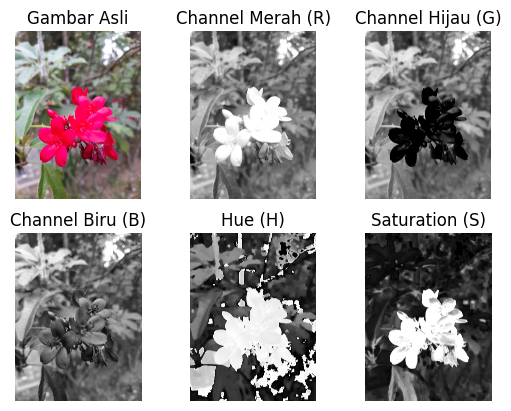

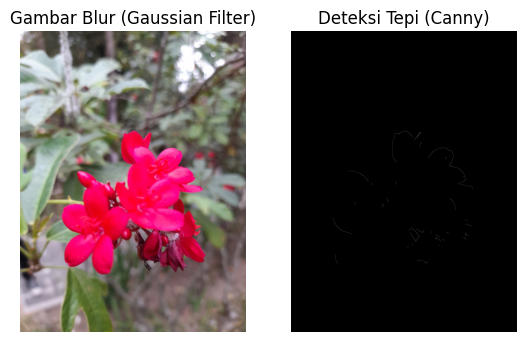

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar berwarna
img = cv2.imread('Bunga Merah.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ubah ke RGB (karena OpenCV menggunakan BGR secara default)

# Menampilkan gambar asli
plt.subplot(231), plt.imshow(img_rgb), plt.title('Gambar Asli')
plt.axis('off')

# Pisahkan channel warna RGB
R, G, B = img_rgb[:, :, 0], img_rgb[:, :, 1], img_rgb[:, :, 2]

# Menampilkan channel warna secara terpisah
plt.subplot(232), plt.imshow(R, cmap='gray'), plt.title('Channel Merah (R)')
plt.axis('off')
plt.subplot(233), plt.imshow(G, cmap='gray'), plt.title('Channel Hijau (G)')
plt.axis('off')
plt.subplot(234), plt.imshow(B, cmap='gray'), plt.title('Channel Biru (B)')
plt.axis('off')

# Konversi gambar dari RGB ke HSV
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
H, S, V = img_hsv[:, :, 0], img_hsv[:, :, 1], img_hsv[:, :, 2]

# Menampilkan gambar pada model HSV
plt.subplot(235), plt.imshow(H, cmap='gray'), plt.title('Hue (H)')
plt.axis('off')
plt.subplot(236), plt.imshow(S, cmap='gray'), plt.title('Saturation (S)')
plt.axis('off')

plt.show()

# ------------------------- FILTERING & EDGE DETECTION -------------------------
# Apply Gaussian Blur (low-pass filter) untuk menghaluskan gambar
img_blur = cv2.GaussianBlur(img_rgb, (11, 11), 0)

# Deteksi tepi menggunakan algoritma Canny
img_edges = cv2.Canny(img_blur, 100, 200)

# Menampilkan hasil filter dan deteksi tepi
plt.subplot(121), plt.imshow(img_blur), plt.title('Gambar Blur (Gaussian Filter)')
plt.axis('off')
plt.subplot(122), plt.imshow(img_edges, cmap='gray'), plt.title('Deteksi Tepi (Canny)')
plt.axis('off')

plt.show()
